In [ ]:
import sys

sys.path.append('../soft/')
sys.path.append('../firmware/')

from qick import *
from qick_training import *
from qick.averager_program import QickSweep
from qick.averager_program import QickRegister
from qick.averager_program import merge_sweeps

import numpy as np
from numpy.fft import fft, fftshift
import matplotlib.pyplot as plt

In [ ]:
# Load bitstream with custom overlay
soc = QickSoc('../firmware/qick_training.bit')
soccfg = soc

print(soccfg)

## Multiplexed Signal Generator Tests
This example uses the Multiplexed Signal Generator to show how this block works. The basic idea is that, using a single RF DAC, up to 4 output tones can be created to excite resonators and read multiple qubits at the same time. Examples include:
1. Create 1-4 output signals with the MUX-ed signal generator for spectral analysis.
2. Create short pulses to show the output is similar to other signal generators.

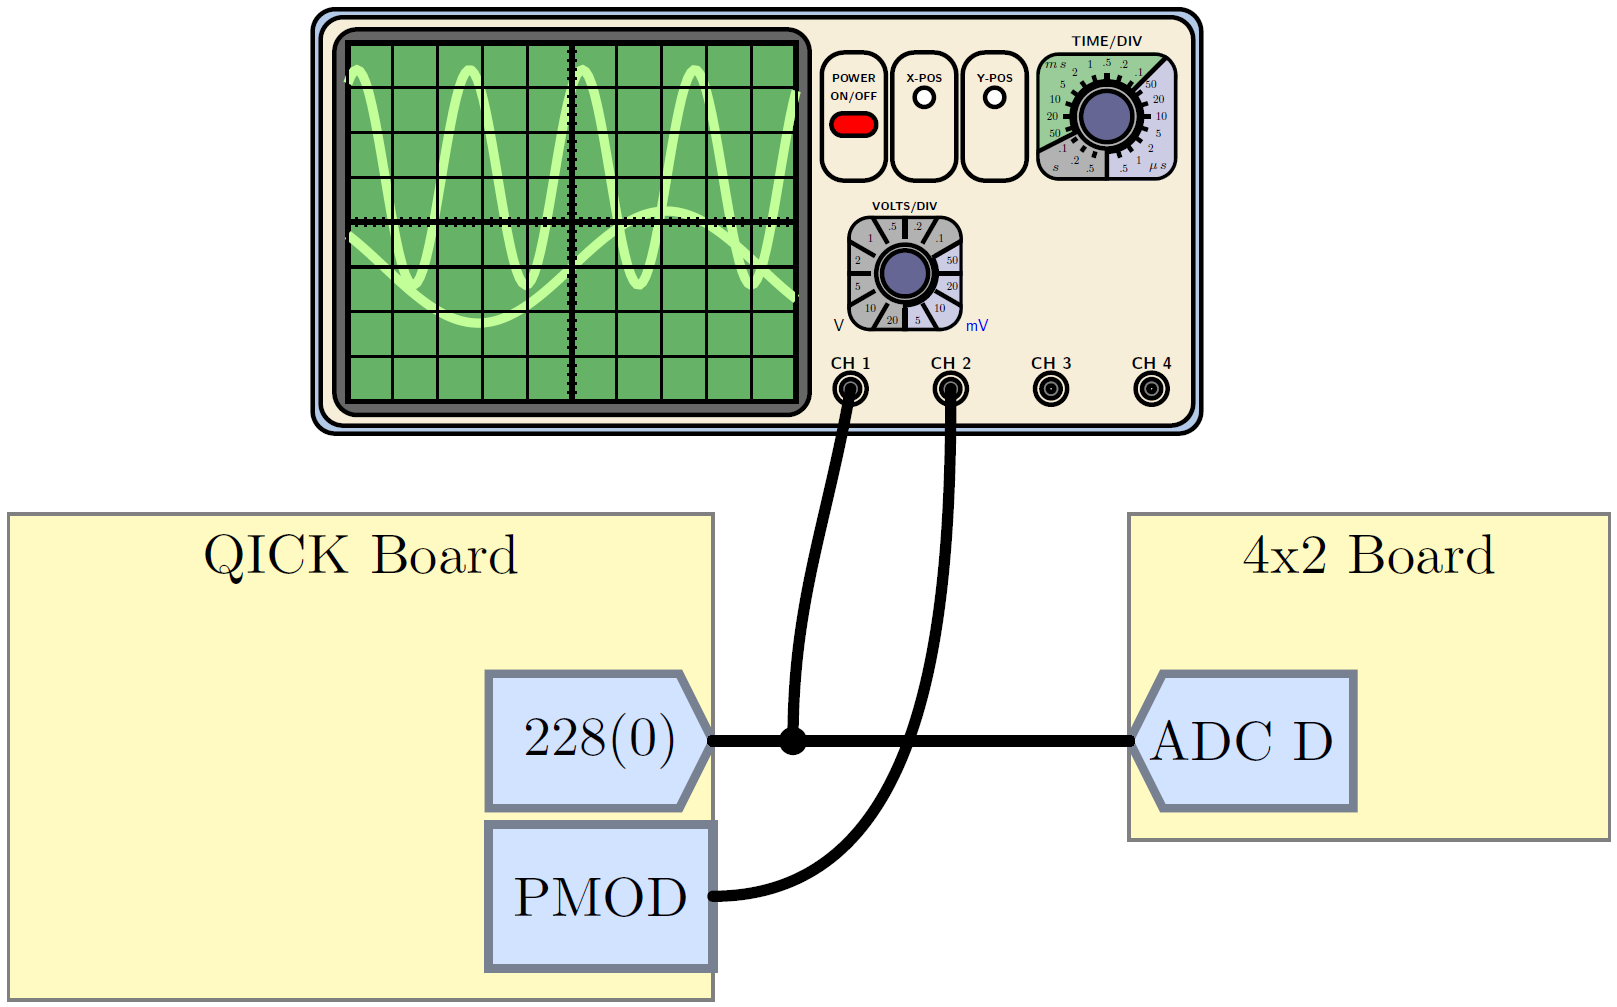

In [47]:
from IPython.display import Image, display
display(Image(filename='images/connections_demo02.png', embed=True))

In [ ]:
##################################################
### Long duration signal for spectrum analysis ###
##################################################
class MuxSGTest(AveragerProgram):
    def initialize(self):
        # Set the nyquist zone
        self.declare_gen(ch=self.cfg["gen_ch"], nqz=1,
                         mixer_freq = self.cfg['mixer_freq'],
                         mux_freqs = self.cfg['pulse_freqs'],
                         mux_gains = self.cfg['pulse_gains'])        
        
        # Pulse registers.
        length = self.us2cycles(self.cfg['pulse_length'], gen_ch=self.cfg['gen_ch'])
        self.set_pulse_registers(ch = self.cfg['gen_ch'], style = 'const', length=length, mask=[0,1,2,3])
        
        self.synci(200)
    
    def body(self):
        # Trigger.
        self.trigger(pins=[0],t=40)

        # Pulses.
        self.pulse(ch=self.cfg['gen_ch'])
       
config={"gen_ch"      : 6,
        "reps"        : 1,
        "mixer_freq"  : 400,
        "pulse_length": 10000000, # 10 s
        "pulse_freqs" : [60,250,400,500],
        "pulse_gains" : [0.9, -0.8, 0.8, -0.9],
        "period"      : 2,
        "phrst"       : 1,
       }

prog = MuxSGTest(soccfg, config)
prog.config_all(soccfg)
soc.tproc.start()

In [ ]:
######################################
### Short Pulses for Scope Capture ###
######################################
class MuxSGTest(AveragerProgram):
    def initialize(self):
        # Set the nyquist zone
        self.declare_gen(ch=self.cfg["gen_ch"], nqz=1,
                         mixer_freq = self.cfg['mixer_freq'],
                         mux_freqs = self.cfg['pulse_freqs'],
                         mux_gains = self.cfg['pulse_gains'])        
        
        # Pulse registers.
        length = self.us2cycles(self.cfg['pulse_length'], gen_ch=self.cfg['gen_ch'])
        self.set_pulse_registers(ch = self.cfg['gen_ch'], style = 'const', length=length, mask=[0,1])
        
        self.synci(200)
    
    def body(self):
        # Trigger.
        self.trigger(pins=[0],t=20)

        # Pulses.
        self.pulse(ch=self.cfg['gen_ch'])
       
config={"gen_ch"      : 6,
        "reps"        : 1,
        "mixer_freq"  : 100,
        "pulse_length": 0.2,
        "pulse_freqs" : [10,30],
        "pulse_gains" : [1.0, 0.3],
        "period"      : 2,
       }

prog = MuxSGTest(soccfg, config)
prog.config_all(soccfg)
soc.tproc.start()